Матрица A:
[[ 2.  3.]
 [ 2. -3.]
 [ 4.  6.]
 [ 2.  3.]]

Вектор b:
[ 6.  1. 12.  0.]


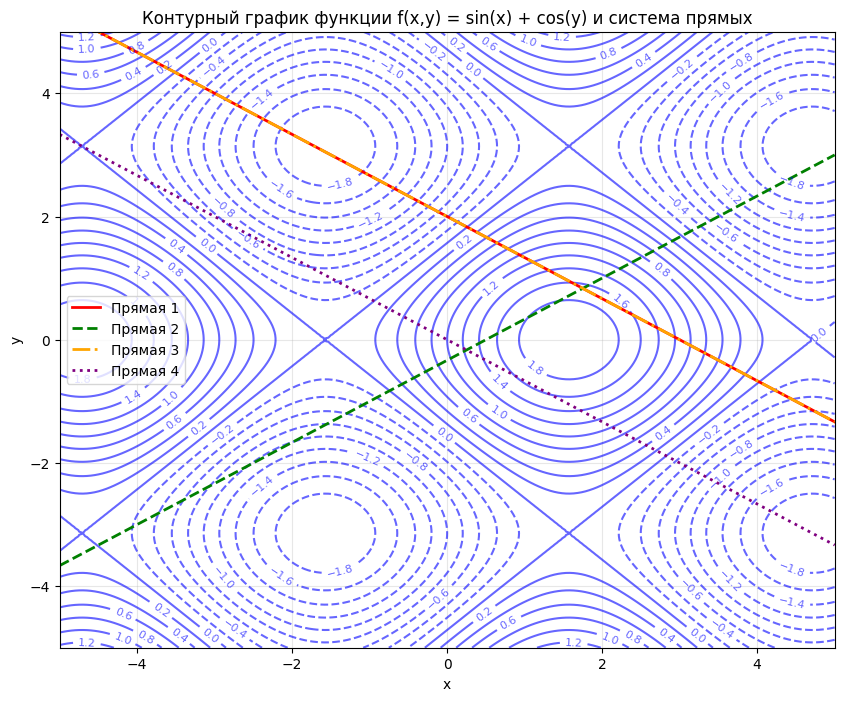

Пересечение прямых 1 и 2: (1.75, 0.83)
Прямые 1 и 3 совпадают.
Прямые 1 и 4 параллельны.
Пересечение прямых 2 и 3: (1.75, 0.83)
Пересечение прямых 2 и 4: (0.25, -0.17)
Прямые 3 и 4 параллельны.


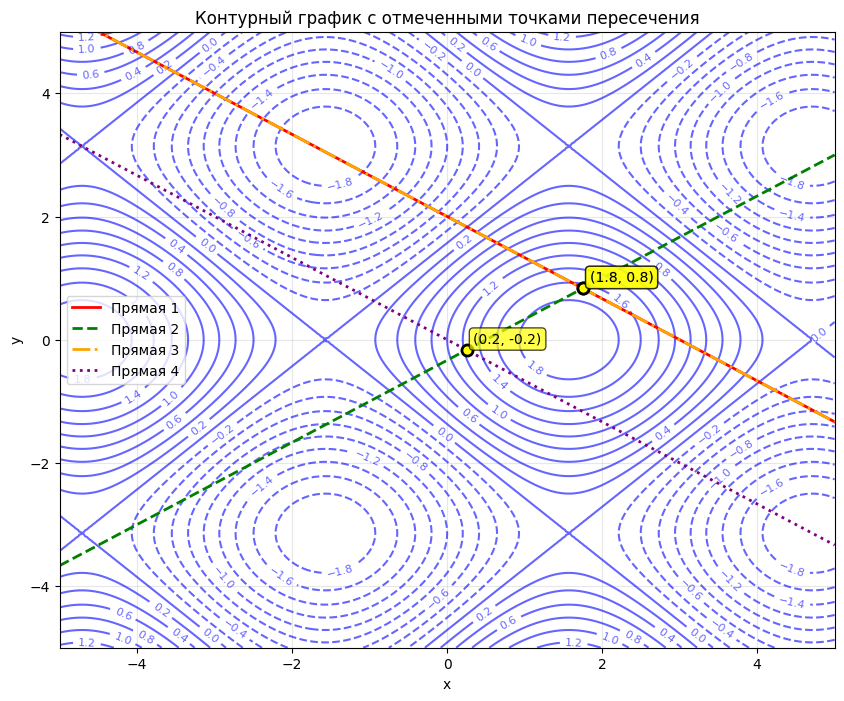


Всего найдено 3 точек пересечения

Ранг матрицы A: 2
Ранг расширенной матрицы [A|b]: 3
Система несовместна

Уникальных прямых: 3
Индексы уникальных прямых: [1, 2, 4]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols
import warnings
warnings.filterwarnings('ignore')

def f(x, y):
    return np.sin(x) + np.cos(y)

def parse_equation(eq_str):
    x, y = symbols('x y')
    lhs, rhs = eq_str.split('~')
    lhs_expr = sp.sympify(lhs.strip())
    rhs_val = float(rhs.strip())
    
    coeffs = [float(lhs_expr.coeff(x)), float(lhs_expr.coeff(y))]
    
    return coeffs, rhs_val

def parse_system(*equations):
    A = []
    b = []
    
    for eq in equations:
        coeffs, rhs = parse_equation(eq)
        A.append(coeffs)
        b.append(rhs)
    
    return np.array(A), np.array(b)

equations = [
    "2*x + 3*y ~ 6",
    "2*x - 3*y ~ 1", 
    "4*x + 6*y ~ 12",
    "2*x + 3*y ~ 0"
]

A, b = parse_system(*equations)
N = len(A)

print("Матрица A:")
print(A)
print("\nВектор b:")
print(b)

x_vals = np.linspace(-5, 5, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=20, colors='blue', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

colors = ['red', 'green', 'orange', 'purple']
linestyles = ['-', '--', '-.', ':']

for i in range(N):
    a1, a2 = A[i]
    bi = b[i]
    
    if abs(a2) > 1e-8:
        y_line = (bi - a1 * x_vals) / a2
        plt.plot(x_vals, y_line, color=colors[i % len(colors)], 
                linestyle=linestyles[i % len(linestyles)], linewidth=2, 
                label=f'Прямая {i+1}')
    else:
        x_vert = bi / a1
        plt.axvline(x=x_vert, color=colors[i % len(colors)], 
                   linestyle=linestyles[i % len(linestyles)], linewidth=2,
                   label=f'Прямая {i+1}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Контурный график функции f(x,y) = sin(x) + cos(y) и система прямых')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

intersections = []

for i in range(N-1):
    for j in range(i+1, N):
        A_sub = np.array([A[i], A[j]])
        b_sub = np.array([b[i], b[j]])
        
        det_val = np.linalg.det(A_sub)
        
        if abs(det_val) > 1e-8:
            sol = np.linalg.solve(A_sub, b_sub)
            intersections.append((i+1, j+1, sol))
            print(f"Пересечение прямых {i+1} и {j+1}: ({sol[0]:.2f}, {sol[1]:.2f})")
        else:
            if abs(A[j, 0]) > 1e-8 and abs(A[j, 1]) > 1e-8:
                ratio_a = A[i] / A[j]
                ratio_b = b[i] / b[j]
                
                if abs(ratio_a[0] - ratio_a[1]) < 1e-6 and abs(ratio_b - ratio_a[0]) < 1e-6:
                    print(f"Прямые {i+1} и {j+1} совпадают.")
                else:
                    print(f"Прямые {i+1} и {j+1} параллельны.")
            else:
                if np.allclose(A[i] * b[j], A[j] * b[i]):
                    print(f"Прямые {i+1} и {j+1} совпадают.")
                else:
                    print(f"Прямые {i+1} и {j+1} параллельны.")

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=20, colors='blue', alpha=0.6)
plt.clabel(contour, inline=True, fontsize=8)

for i in range(N):
    a1, a2 = A[i]
    bi = b[i]
    
    if abs(a2) > 1e-8:
        y_line = (bi - a1 * x_vals) / a2
        plt.plot(x_vals, y_line, color=colors[i % len(colors)], 
                linestyle=linestyles[i % len(linestyles)], linewidth=2, 
                label=f'Прямая {i+1}')
    else:
        x_vert = bi / a1
        plt.axvline(x=x_vert, color=colors[i % len(colors)], 
                   linestyle=linestyles[i % len(linestyles)], linewidth=2,
                   label=f'Прямая {i+1}')

for i, j, sol in intersections:
    plt.plot(sol[0], sol[1], 'ko', markersize=8, markerfacecolor='yellow', 
             markeredgecolor='black', markeredgewidth=2)
    plt.annotate(f'({sol[0]:.1f}, {sol[1]:.1f})', 
                xy=(sol[0], sol[1]), xytext=(5, 5), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.xlabel('x')
plt.ylabel('y')
plt.title('Контурный график с отмеченными точками пересечения')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()

print(f"\nВсего найдено {len(intersections)} точек пересечения")

rank_A = np.linalg.matrix_rank(A)
rank_Ab = np.linalg.matrix_rank(np.column_stack([A, b]))

print(f"\nРанг матрицы A: {rank_A}")
print(f"Ранг расширенной матрицы [A|b]: {rank_Ab}")

if rank_A == rank_Ab:
    if rank_A == 2:
        print("Система имеет единственное решение")
    else:
        print("Система имеет бесконечно много решений")
else:
    print("Система несовместна")

unique_lines = []
for i in range(N):
    is_duplicate = False
    for j in range(len(unique_lines)):
        if np.allclose(A[i] * b[unique_lines[j]], A[unique_lines[j]] * b[i]) and \
           np.allclose(np.cross(A[i], A[unique_lines[j]]), 0):
            is_duplicate = True
            break
    if not is_duplicate:
        unique_lines.append(i)

print(f"\nУникальных прямых: {len(unique_lines)}")
print(f"Индексы уникальных прямых: {[i+1 for i in unique_lines]}")

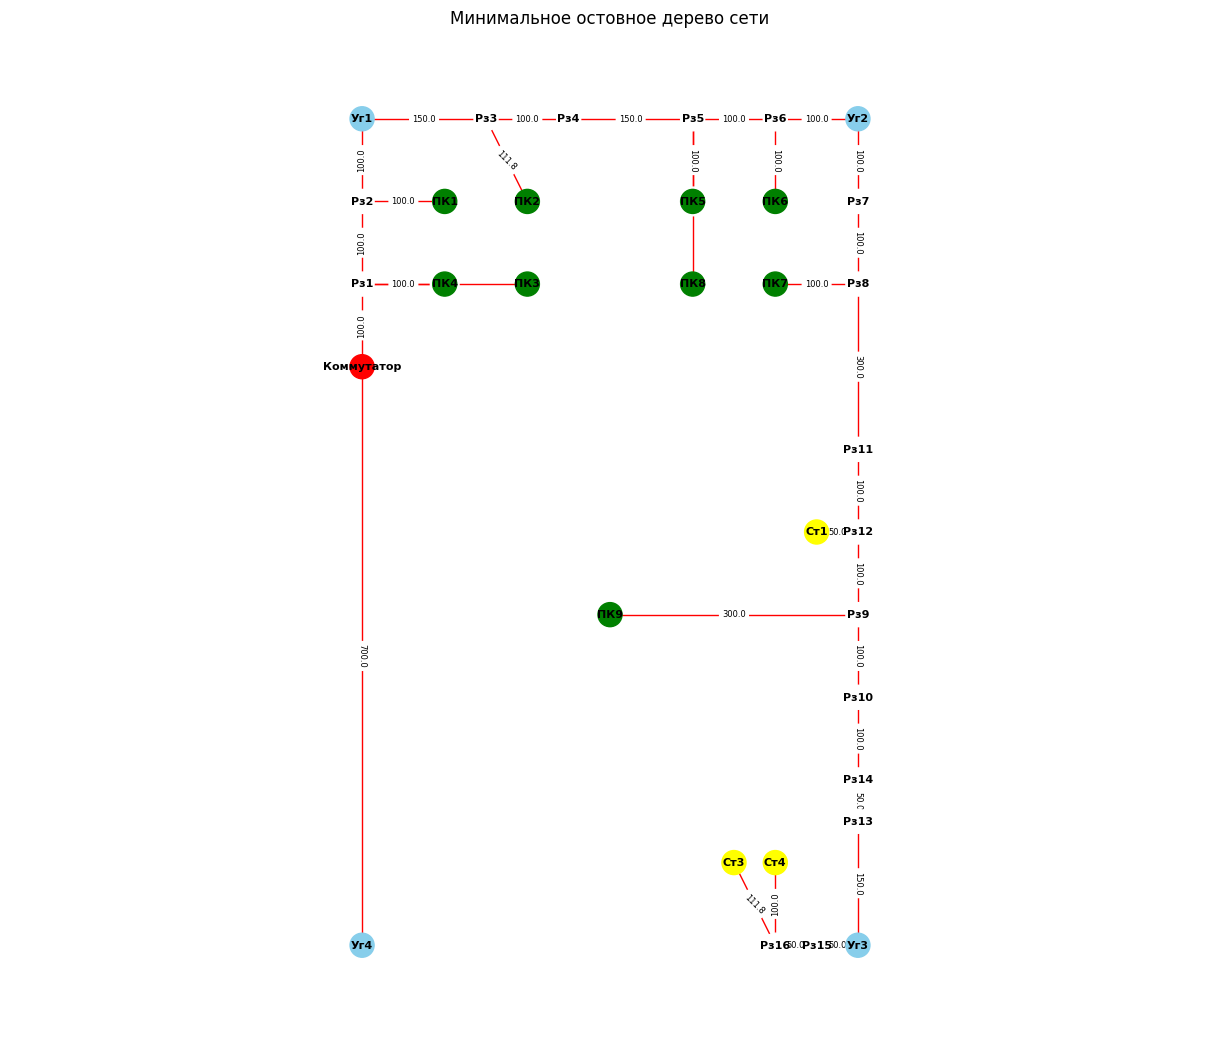

Общая длина кабеля: 4373.6

Ребра минимального остовного дерева:
        От    К  Длина
Коммутатор  Рз1  100.0
Коммутатор  Уг4  700.0
       Рз1  Рз2  100.0
       Рз1  ПК4  100.0
       Рз1  ПК3  200.0
       Рз2  Уг1  100.0
       Рз2  ПК1  100.0
       Уг1  Рз3  150.0
       Рз3  Рз4  100.0
       Рз3  ПК2  111.8
       Рз4  Рз5  150.0
       Рз5  Рз6  100.0
       Рз5  ПК5  100.0
       Рз5  ПК8  200.0
       Рз6  Уг2  100.0
       Рз6  ПК6  100.0
       Уг2  Рз7  100.0
       Рз7  Рз8  100.0
       Рз8 Рз11  300.0
       Рз8  ПК7  100.0
      Рз11 Рз12  100.0
      Рз12  Рз9  100.0
      Рз12  Ст1   50.0
       Рз9 Рз10  100.0
       Рз9  ПК9  300.0
      Рз10 Рз14  100.0
      Рз14 Рз13   50.0
      Рз13  Уг3  150.0
       Уг3 Рз15   50.0
      Рз15 Рз16   50.0
      Рз16  Ст4  100.0
      Рз16  Ст3  111.8


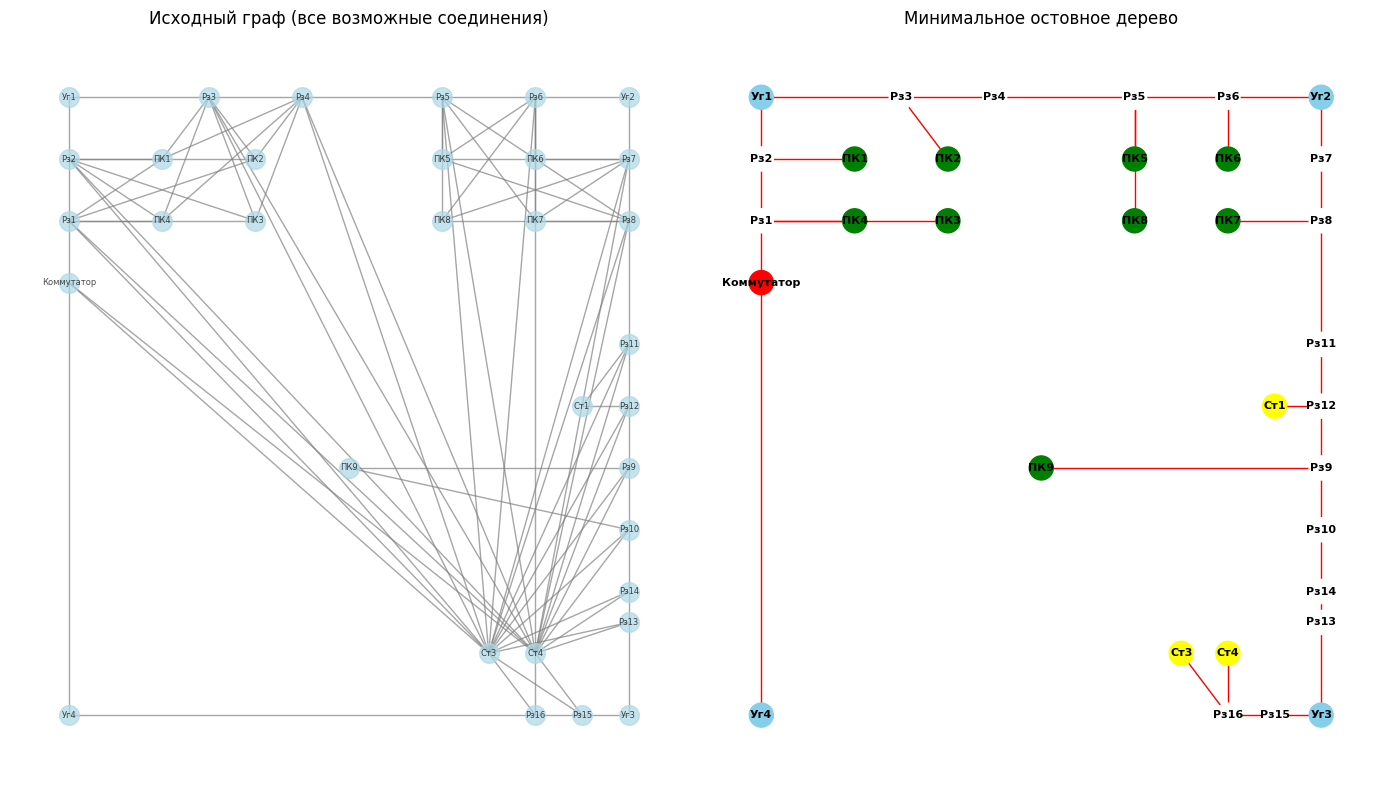


Статистика:
Количество узлов: 33
Количество ребер в МОД: 32
Количество ребер в исходном графе: 91
Сокращение ребер: 59
Обязательных ребер в МОД: 20
Всего обязательных ребер: 21


In [16]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import subprocess
import tempfile
import os

vertex = pd.read_csv("vertex.csv")
edge = pd.read_csv("edge.csv")

g = nx.from_pandas_edgelist(edge, source='from', target='to', edge_attr=['weight'], create_using=nx.Graph())

for _, row in vertex.iterrows():
    if row['Устройство'] in g.nodes:
        g.nodes[row['Устройство']]['type'] = row['Тип']
        g.nodes[row['Устройство']]['group'] = row['Группа']
        g.nodes[row['Устройство']]['posX'] = row['X']
        g.nodes[row['Устройство']]['posY'] = row['Y']

group_mappings = pd.DataFrame({
    'device_group': ["Компьютеры 1", "Компьютеры 2", "Компьютеры 3", "Стенды 1", "Стенды 2"],
    'socket_group': ["Розетки 1", "Розетки 2", "Розетки 3", "Розетки 4", "Розетки 5"]
})

new_edges = edge[['from', 'to', 'weight']].copy()
new_edges['weight'] = pd.to_numeric(new_edges['weight'])

for _, mapping in group_mappings.iterrows():
    dev_group = mapping['device_group']
    sock_group = mapping['socket_group']
    
    devices = vertex[(vertex['Группа'] == dev_group) & 
                    (vertex['Тип'].isin(['компьютер', 'стенд']))]
    sockets = vertex[(vertex['Группа'] == sock_group) & 
                    (vertex['Тип'] == 'розетка')]
    
    for _, device in devices.iterrows():
        for _, socket in sockets.iterrows():
            dist = np.sqrt((device['X'] - socket['X'])**2 + (device['Y'] - socket['Y'])**2)
            new_edge = pd.DataFrame({
                'from': [device['Устройство']],
                'to': [socket['Устройство']],
                'weight': [dist]
            })
            new_edges = pd.concat([new_edges, new_edge], ignore_index=True)

non_group_devices = vertex[~vertex['Группа'].isin(group_mappings['device_group']) & 
                          vertex['Тип'].isin(['компьютер', 'стенд'])]
sockets_and_switches = vertex[vertex['Тип'].isin(['розетка', 'коммутатор'])]

for _, device in non_group_devices.iterrows():
    for _, socket_switch in sockets_and_switches.iterrows():
        dist = np.sqrt((device['X'] - socket_switch['X'])**2 + 
                      (device['Y'] - socket_switch['Y'])**2)
        new_edge = pd.DataFrame({
            'from': [device['Устройство']],
            'to': [socket_switch['Устройство']],
            'weight': [dist]
        })
        new_edges = pd.concat([new_edges, new_edge], ignore_index=True)

g = nx.from_pandas_edgelist(new_edges, source='from', target='to', edge_attr=['weight'], create_using=nx.Graph())

for _, row in vertex.iterrows():
    if row['Устройство'] in g.nodes:
        g.nodes[row['Устройство']]['type'] = row['Тип']
        g.nodes[row['Устройство']]['group'] = row['Группа']
        g.nodes[row['Устройство']]['posX'] = row['X']
        g.nodes[row['Устройство']]['posY'] = row['Y']

mandatory_edges = set()
for _, row in edge.iterrows():
    mandatory_edges.add((row['from'], row['to']))
    mandatory_edges.add((row['to'], row['from']))

for u, v, data in g.edges(data=True):
    if (u, v) in mandatory_edges or (v, u) in mandatory_edges:
        data['mandatory'] = True
        data['weight_temp'] = 0.0001
    else:
        data['mandatory'] = False
        data['weight_temp'] = data['weight']

weights = {(u, v): data['weight_temp'] for u, v, data in g.edges(data=True)}
g_mst = nx.minimum_spanning_tree(g, weight='weight_temp')

for u, v, data in g_mst.edges(data=True):
    original_weight = g[u][v]['weight']
    data['weight'] = original_weight

for _, row in vertex.iterrows():
    if row['Устройство'] in g_mst.nodes:
        g_mst.nodes[row['Устройство']]['type'] = row['Тип']
        g_mst.nodes[row['Устройство']]['group'] = row['Группа']
        g_mst.nodes[row['Устройство']]['posX'] = row['X']
        g_mst.nodes[row['Устройство']]['posY'] = row['Y']

node_colors = []
for node in g_mst.nodes():
    node_type = g_mst.nodes[node].get('type', '')
    if node_type == "коммутатор":
        node_colors.append("red")
    elif node_type == "угловая точка":
        node_colors.append("skyblue")
    elif node_type == "компьютер":
        node_colors.append("green")
    elif node_type == "стенд":
        node_colors.append("yellow")
    elif node_type == "розетка":
        node_colors.append("white")
    else:
        node_colors.append("grey")

pos = {}
for node in g_mst.nodes():
    pos[node] = (g_mst.nodes[node]['posX'] * 1.5, g_mst.nodes[node]['posY'] * 1.5)

plt.figure(figsize=(12, 10))
nx.draw(g_mst, pos, 
        node_color=node_colors, 
        node_size=300,
        edge_color='red',
        with_labels=True,
        font_size=8,
        font_weight='bold')

edge_labels = {}
for u, v, data in g_mst.edges(data=True):
    edge_labels[(u, v)] = f"{data['weight']:.1f}"

nx.draw_networkx_edge_labels(g_mst, pos, edge_labels, font_size=6)

plt.title("Минимальное остовное дерево сети")
plt.axis('equal')
plt.show()

total_cable = sum(data['weight'] for u, v, data in g_mst.edges(data=True))
print(f"Общая длина кабеля: {total_cable:.1f}")

mst_edges_table = []
for u, v, data in g_mst.edges(data=True):
    mst_edges_table.append({
        'От': u,
        'К': v,
        'Длина': round(data['weight'], 1)
    })

mst_df = pd.DataFrame(mst_edges_table)
print("\nРебра минимального остовного дерева:")
print(mst_df.to_string(index=False))

# def run_minizinc(model_file):
#     with tempfile.NamedTemporaryFile(mode='w', suffix='.txt', delete=False) as result_file:
#         result_file_path = result_file.name
    
#     try:
#         command = f'minizinc "{model_file}" > "{result_file_path}"'
#         exit_code = subprocess.run(command, shell=True, check=False)
        
#         with open(result_file_path, 'r', encoding='utf-8') as f:
#             result_lines = f.readlines()
        
#         return [line.strip() for line in result_lines]
    
#     finally:
#         if os.path.exists(result_file_path):
#             os.unlink(result_file_path)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)
nx.draw(g, pos,
        node_color='lightblue',
        node_size=200,
        edge_color='gray',
        with_labels=True,
        font_size=6,
        alpha=0.7)
plt.title("Исходный граф (все возможные соединения)")

plt.subplot(1, 2, 2)
nx.draw(g_mst, pos,
        node_color=node_colors,
        node_size=300,
        edge_color='red',
        with_labels=True,
        font_size=8,
        font_weight='bold')
plt.title("Минимальное остовное дерево")

plt.tight_layout()
plt.show()

print(f"\nСтатистика:")
print(f"Количество узлов: {g_mst.number_of_nodes()}")
print(f"Количество ребер в МОД: {g_mst.number_of_edges()}")
print(f"Количество ребер в исходном графе: {g.number_of_edges()}")
print(f"Сокращение ребер: {g.number_of_edges() - g_mst.number_of_edges()}")

mandatory_in_mst = sum(1 for u, v in g_mst.edges() 
                      if (u, v) in mandatory_edges or (v, u) in mandatory_edges)
print(f"Обязательных ребер в МОД: {mandatory_in_mst}")
print(f"Всего обязательных ребер: {len(mandatory_edges) // 2}")

In [17]:
from itertools import permutations

def solve_cryptarithmetic():
    digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    for perm in permutations(digits, 7):
        G, E, T, B, Y, A, R = perm
        
        # NOTE: split to two seq 
        if G == 0 or B == 0:
            continue
            
        GET = 100 * G + 10 * E + T  # Трёхзначное число GET
        BY = 10 * B + Y # Двузначное число BY
        BEARE = 10000 * B + 1000 * E + 100 * A + 10 * R + E # Пятизначное число BEARE
        
        if GET * BY == BEARE:
            return {
                'G': G, 'E': E, 'T': T, 'B': B, 
                'Y': Y, 'A': A, 'R': R,
                'GET': GET, 'BY': BY, 'BEARE': BEARE
            }
    
    return None

result = solve_cryptarithmetic()

print("GET x BY = BEARE:")
print(f"G = {result['G']}")
print(f"E = {result['E']}")
print(f"T = {result['T']}")
print(f"B = {result['B']}")
print(f"Y = {result['Y']}")
print(f"A = {result['A']}")
print(f"R = {result['R']}")
print()
print(f"Проверка: {result['GET']} x {result['BY']} = {result['BEARE']}")
print(f"Результат: {result['GET'] * result['BY']} = {result['BEARE']}")
print(f"Верно: {result['GET'] * result['BY'] == result['BEARE']}")

GET x BY = BEARE:
G = 7
E = 0
T = 8
B = 1
Y = 5
A = 6
R = 2

Проверка: 708 x 15 = 10620
Результат: 10620 = 10620
Верно: True


In [1]:
# import minizinc
# import asyncio

# def solve_cryptarithmetic():
#     model_code = """
# include "all_different.mzn";

# var 0..9: G;
# var 0..9: E;
# var 0..9: T;
# var 0..9: B;
# var 0..9: Y;
# var 0..9: A;
# var 0..9: R;

# constraint all_different([G, E, T, B, Y, A, R]);

# constraint G != 0;
# constraint B != 0;

# constraint (100*G + 10*E + T) * (10*B + Y) = (10000*B + 1000*E + 100*A + 10*R + E);

# solve satisfy;

# output [
#   "GET x BY = BEARE:\\n",
#   "G = ", show(G), "\\n",
#   "E = ", show(E), "\\n", 
#   "T = ", show(T), "\\n",
#   "B = ", show(B), "\\n",
#   "Y = ", show(Y), "\\n",
#   "A = ", show(A), "\\n",
#   "R = ", show(R), "\\n",
# ];
# """

#     model = minizinc.Model()
#     model.add_string(model_code)
    
#     gecode = minizinc.Solver.lookup("gecode")
#     instance = minizinc.Instance(gecode, model)
    
#     result = instance.solve()
#     print("GET x BY = BEARE:")
#     print(f"G = {result.solution.G}")
#     print(f"E = {result.solution.E}")
#     print(f"T = {result.solution.T}")
#     print(f"B = {result.solution.B}")
#     print(f"Y = {result.solution.Y}")
#     print(f"A = {result.solution.A}")
#     print(f"R = {result.solution.R}")
    
#     print(f"\nПроверка:")
#     G, E, T, B, Y, A, R = result.solution.G, result.solution.E, result.solution.T, result.solution.B, result.solution.Y, result.solution.A, result.solution.R
#     get_value = 100*G + 10*E + T
#     by_value = 10*B + Y
#     beare_value = 10000*B + 1000*E + 100*A + 10*R + E
#     print(f"{get_value} x {by_value} = {beare_value}")
#     print(f"Результат умножения: {get_value * by_value}")
#     print(f"Равенство выполняется: {get_value * by_value == beare_value}")



# solve_cryptarithmetic()

RuntimeError: the synchronous MiniZinc Python `solve()` method was called from an asynchronous environment.

Because Python's asyncio library does not support using multiple event loops that would be required to use this method, we instead suggest you use the `solve_async()' method or patch Python behaviour with a package such as `nested_asyncio'.

Original message: asyncio.run() cannot be called from a running event loop

Сложность 10!/(10 - 7)! = 10!/3! = 10 * 9 * ... 4 = 604 800 

In [18]:
# from itertools import permutations

# def solve_jindosh_riddle():
#     ladies = ['Winslow', 'Marcolla', 'Conti', 'Natsiou', 'Finch']
#     colors = ['Blue', 'White', 'Red', 'Purple', 'Green']
#     cities = ['Morley', 'Freyport', 'Dunwall', 'Serkanos', 'Baleton']
#     drinks = ['Whiskey', 'Absinthe', 'Cider', 'Rum', 'Beer']
#     jewels = ['Cigarette_Case', 'Bird_Pendant', 'Ring', 'Diamond', 'Medal']
    
#     for lady_perm in permutations(range(5)):
#         for color_perm in permutations(colors):
#             for city_perm in permutations(cities):
#                 for drink_perm in permutations(drinks):
#                     for jewel_perm in permutations(jewels):
                        
#                         lady_pos = dict(zip(ladies, lady_perm))
#                         color_at_pos = dict(zip(range(5), color_perm))
#                         city_at_pos = dict(zip(range(5), city_perm))
#                         drink_at_pos = dict(zip(range(5), drink_perm))
#                         jewel_at_pos = dict(zip(range(5), jewel_perm))
                        
#                         if color_at_pos[lady_pos['Winslow']] != 'Blue':
#                             continue
                            
#                         if lady_pos['Marcolla'] != 0:
#                             continue
                            
#                         if color_at_pos[1] != 'White':
#                             continue
                            
#                         red_purple_adjacent = False
#                         for p in range(4):
#                             if color_at_pos[p] == 'Red' and color_at_pos[p+1] == 'Purple':
#                                 red_purple_adjacent = True
#                                 break
#                         if not red_purple_adjacent:
#                             continue
                            
#                         red_whiskey_valid = True
#                         for p in range(5):
#                             if color_at_pos[p] == 'Red' and drink_at_pos[p] != 'Whiskey':
#                                 red_whiskey_valid = False
#                                 break
#                         if not red_whiskey_valid:
#                             continue
                            
#                         morley_green_valid = True
#                         for p in range(5):
#                             if city_at_pos[p] == 'Morley' and color_at_pos[p] != 'Green':
#                                 morley_green_valid = False
#                                 break
#                         if not morley_green_valid:
#                             continue
                            
#                         cigarette_morley_adjacent = False
#                         for p in range(4):
#                             if ((jewel_at_pos[p] == 'Cigarette_Case' and city_at_pos[p+1] == 'Morley') or
#                                 (jewel_at_pos[p+1] == 'Cigarette_Case' and city_at_pos[p] == 'Morley')):
#                                 cigarette_morley_adjacent = True
#                                 break
#                         if not cigarette_morley_adjacent:
#                             continue
                            
#                         if jewel_at_pos[lady_pos['Finch']] != 'Bird_Pendant':
#                             continue
                            
#                         freyport_ring_valid = True
#                         for p in range(5):
#                             if city_at_pos[p] == 'Freyport' and jewel_at_pos[p] != 'Ring':
#                                 freyport_ring_valid = False
#                                 break
#                         if not freyport_ring_valid:
#                             continue
                            
#                         diamond_dunwall_adjacent = False
#                         for p in range(4):
#                             if ((jewel_at_pos[p] == 'Diamond' and city_at_pos[p+1] == 'Dunwall') or
#                                 (jewel_at_pos[p+1] == 'Diamond' and city_at_pos[p] == 'Dunwall')):
#                                 diamond_dunwall_adjacent = True
#                                 break
#                         if not diamond_dunwall_adjacent:
#                             continue
                            
#                         if drink_at_pos[lady_pos['Conti']] != 'Absinthe':
#                             continue
                            
#                         serkanos_cider_valid = True
#                         for p in range(5):
#                             if city_at_pos[p] == 'Serkanos' and drink_at_pos[p] != 'Cider':
#                                 serkanos_cider_valid = False
#                                 break
#                         if not serkanos_cider_valid:
#                             continue
                            
#                         if drink_at_pos[2] != 'Rum':
#                             continue
                            
#                         if city_at_pos[lady_pos['Natsiou']] != 'Baleton':
#                             continue
                        
#                         return {
#                             'lady_pos': lady_pos,
#                             'color_at_pos': color_at_pos,
#                             'city_at_pos': city_at_pos,
#                             'drink_at_pos': drink_at_pos,
#                             'jewel_at_pos': jewel_at_pos
#                         }
    
#     return None

# result = solve_jindosh_riddle()

# if result:
#     print("Jindosh Riddle Solution:")
#     print(f"Lady positions: {result['lady_pos']}")
#     print(f"Colors: {result['color_at_pos']}")
#     print(f"Cities: {result['city_at_pos']}")
#     print(f"Drinks: {result['drink_at_pos']}")
#     print(f"Jewels: {result['jewel_at_pos']}")
#     print()
    
#     for lady in ['Winslow', 'Marcolla', 'Conti', 'Natsiou', 'Finch']:
#         pos = result['lady_pos'][lady]
#         print(f"{lady} at position: {pos + 1}")
    
#     print()
#     print("Detailed arrangement:")
#     for pos in range(5):
#         lady = [k for k, v in result['lady_pos'].items() if v == pos][0]
#         color = result['color_at_pos'][pos]
#         city = result['city_at_pos'][pos]
#         drink = result['drink_at_pos'][pos]
#         jewel = result['jewel_at_pos'][pos]
#         print(f"Position {pos + 1}: {lady}, {color}, {city}, {drink}, {jewel}")
        
#     print()
#     print("Lost jewels ownership:")
#     lost_jewels = ['Cigarette_Case', 'Medal', 'Ring', 'Diamond']
#     for jewel in lost_jewels:
#         for pos in range(5):
#             if result['jewel_at_pos'][pos] == jewel:
#                 lady = [k for k, v in result['lady_pos'].items() if v == pos][0]
#                 print(f"{jewel}: {lady}")
#                 break
                
# else:
#     print("No solution found")

KeyboardInterrupt: 

In [25]:
# import minizinc
# import tempfile
# import os

# def solve_jindosh_riddle():
#     model_code = '''
# include "all_different.mzn";

# enum Lady = {Winslow, Marcolla, Conti, Natsiou, Finch};
# set of int: Position = 1..5;
# enum Color = {Blue, White, Red, Purple, Green};
# enum City = {Morley, Freyport, Dunwall, Serkanos, Baleton};
# enum Drink = {Whiskey, Absinthe, Cider, Rum, Beer};
# enum Jewel = {Cigarette_Case, Bird_Pendant, Ring, Diamond, Medal};

# array[Lady] of var Position: lady_pos;
# array[Position] of var Color: color_at_pos;
# array[Position] of var City: city_at_pos;
# array[Position] of var Drink: drink_at_pos;
# array[Position] of var Jewel: jewel_at_pos;

# constraint all_different(lady_pos);
# constraint all_different(color_at_pos);
# constraint all_different(city_at_pos);
# constraint all_different(drink_at_pos);
# constraint all_different(jewel_at_pos);

# constraint color_at_pos[lady_pos[Winslow]] = Blue;
# constraint lady_pos[Marcolla] = 1;
# constraint color_at_pos[2] = White;

# constraint exists(p in 1..4)(
#   color_at_pos[p] = Red /\\ color_at_pos[p+1] = Purple
# );

# constraint forall(p in Position)(
#   color_at_pos[p] = Red -> drink_at_pos[p] = Whiskey
# );

# constraint forall(p in Position)(
#   city_at_pos[p] = Morley -> color_at_pos[p] = Green
# );

# constraint exists(p in 1..4)(
#   (jewel_at_pos[p] = Cigarette_Case /\\ city_at_pos[p+1] = Morley) \\/
#   (jewel_at_pos[p+1] = Cigarette_Case /\\ city_at_pos[p] = Morley)
# );

# constraint jewel_at_pos[lady_pos[Finch]] = Bird_Pendant;

# constraint forall(p in Position)(
#   city_at_pos[p] = Freyport -> jewel_at_pos[p] = Ring
# );

# constraint exists(p in 1..4)(
#   (jewel_at_pos[p] = Diamond /\\ city_at_pos[p+1] = Dunwall) \\/
#   (jewel_at_pos[p+1] = Diamond /\\ city_at_pos[p] = Dunwall)
# );

# constraint drink_at_pos[lady_pos[Conti]] = Absinthe;

# constraint forall(p in Position)(
#   city_at_pos[p] = Serkanos -> drink_at_pos[p] = Cider
# );

# constraint drink_at_pos[3] = Rum;
# constraint city_at_pos[lady_pos[Natsiou]] = Baleton;

# solve satisfy;

# output [
#   "Jindosh Riddle Solution:\\n",
#   "Positions: ", show(lady_pos), "\\n",
#   "Colors: ", show(color_at_pos), "\\n", 
#   "Cities: ", show(city_at_pos), "\\n",
#   "Drinks: ", show(drink_at_pos), "\\n",
#   "Jewels: ", show(jewel_at_pos), "\\n\\n",
#   "Winslow at position: ", show(lady_pos[Winslow]), "\\n",
#   "Marcolla at position: ", show(lady_pos[Marcolla]), "\\n", 
#   "Conti at position: ", show(lady_pos[Conti]), "\\n",
#   "Natsiou at position: ", show(lady_pos[Natsiou]), "\\n",
#   "Finch at position: ", show(lady_pos[Finch]), "\\n",
# ];
# '''
    
#     with tempfile.NamedTemporaryFile(mode='w', suffix='.mzn', delete=False) as f:
#         f.write(model_code)
#         model_file = f.name
    
#     try:
#         model = minizinc.Model(model_file)
#         instance = minizinc.Instance(minizinc.Solver.lookup("gecode"), model)
#         result = instance.solve()
        
#         if result.solution is not None:
#             output = str(result)
#             return output
#         else:
#             return "No solution found"
            
#     finally:
#         os.unlink(model_file)

# result = solve_jindosh_riddle()
# print(result)

AssertionError: 

In [29]:
from itertools import combinations

def solve_guard_problem():
    num_rooms = 19
    
    guard_coverage = {
        'a': [1, 3],
        'b': [3, 4], 
        'c': [2, 5],
        'd': [3, 5],
        'e': [4, 5],
        'f': [6, 7],
        'g': [6, 8],
        'h': [7, 8],
        'i': [5, 9],
        'j': [7, 8, 9],
        'k': [9, 10, 13],
        'l': [9, 17],
        'm': [10, 11, 12],
        'n': [10, 11, 12],
        'o': [10, 13],
        'p': [11, 14],
        'q': [14, 15],
        'r': [16, 17],
        's': [16, 18],
        't': [17, 18],
        'u': [17, 19]
    }
    
    guards = list(guard_coverage.keys())
    all_rooms = set(range(1, num_rooms + 1))
    
    for num_guards in range(1, len(guards) + 1):
        for guard_combination in combinations(guards, num_guards):
            covered_rooms = set()

            # Объединяем все комнаты, которые видят выбранные охранники
            # Проверяем, покрывают ли они все 19 комнат
            # Если да — возвращаем это решение (оно будет минимальным)
            for guard in guard_combination:
                covered_rooms.update(guard_coverage[guard])
            
            if covered_rooms >= all_rooms:
                return num_guards, list(guard_combination)
    
    return None


print("=== Guard Problem Solution ===")
guard_result = solve_guard_problem()

num_guards, selected_guards = guard_result
print(f"Минимальное необходимое количество охранников: {num_guards}")
print(f"Выбранные охранники: {selected_guards}")

guard_used = ['false'] * 21
guard_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u']
for guard in selected_guards:
    guard_used[guard_names.index(guard)] = 'true'

print(f"Позиция: [{', '.join(guard_used)}]")

    
guard_coverage = {
    'a': [1, 3], 'b': [3, 4], 'c': [2, 5], 'd': [3, 5], 'e': [4, 5],
    'f': [6, 7], 'g': [6, 8], 'h': [7, 8], 'i': [5, 9], 'j': [7, 8, 9],
    'k': [9, 10, 13], 'l': [9, 17], 'm': [10, 11, 12], 'n': [10, 11, 12],
    'o': [10, 13], 'p': [11, 14], 'q': [14, 15], 'r': [16, 17], 's': [16, 18],
    't': [17, 18], 'u': [17, 19]
}

print("\n=== Покрытие сбошниками  ===")
for guard, rooms in guard_coverage.items():
    print(f"сбошник {guard}: комната {rooms}")


=== Guard Problem Solution ===
Минимальное необходимое количество охранников: 10
Выбранные охранники: ['a', 'b', 'c', 'f', 'g', 'k', 'm', 'q', 's', 'u']
Позиция: [true, true, true, false, false, true, true, false, false, false, true, false, true, false, false, false, true, false, true, false, true]

=== Покрытие сбошниками  ===
сбошник a: комната [1, 3]
сбошник b: комната [3, 4]
сбошник c: комната [2, 5]
сбошник d: комната [3, 5]
сбошник e: комната [4, 5]
сбошник f: комната [6, 7]
сбошник g: комната [6, 8]
сбошник h: комната [7, 8]
сбошник i: комната [5, 9]
сбошник j: комната [7, 8, 9]
сбошник k: комната [9, 10, 13]
сбошник l: комната [9, 17]
сбошник m: комната [10, 11, 12]
сбошник n: комната [10, 11, 12]
сбошник o: комната [10, 13]
сбошник p: комната [11, 14]
сбошник q: комната [14, 15]
сбошник r: комната [16, 17]
сбошник s: комната [16, 18]
сбошник t: комната [17, 18]
сбошник u: комната [17, 19]


...

Комната 3:  покрыта охранниками 'a', 'b' ✓ (избыточность)

...

Комната 6:  покрыта охранниками 'f', 'g' ✓ (избыточность)

...

Комната 10: покрыта охранниками 'k', 'm' ✓ (избыточность)

...

In [34]:
def solve_router_problem():
    clusters = list(range(1, 13))
    
    router_data = {
        1: {'cost': 4.50, 'coverage': [1, 3, 7, 10]},
        2: {'cost': 3.10, 'coverage': [3, 4, 10]},
        3: {'cost': 2.30, 'coverage': [1, 2, 11]},
        4: {'cost': 7.20, 'coverage': [1, 2, 3, 4, 11]},
        5: {'cost': 1.80, 'coverage': [6, 8]},
        6: {'cost': 6.90, 'coverage': [5, 6, 8, 9, 12]},
        7: {'cost': 4.70, 'coverage': [1, 2, 7, 11]},
        8: {'cost': 3.40, 'coverage': [5, 9, 12]}
    }
    
    routers = list(router_data.keys())
    all_clusters = set(clusters)
    
    min_cost = float('inf')
    best_solution = None
    
    for num_routers in range(1, len(routers) + 1):
        for router_combination in combinations(routers, num_routers):
            covered_clusters = set()
            total_cost = 0
            
            for router in router_combination:
                covered_clusters.update(router_data[router]['coverage'])
                total_cost += router_data[router]['cost']
            
            if covered_clusters >= all_clusters and total_cost < min_cost:
                min_cost = total_cost
                best_solution = (total_cost, list(router_combination))
    
    return best_solution

print("\n=== Router Problem Solution ===")
router_result = solve_router_problem()
total_cost, selected_routers = router_result
print(f"Минимальная общая стоимость: {total_cost:1f}")
print(f"Выбранные роутеры: {selected_routers}")

router_installed = ['false'] * 8
for router in selected_routers:
    router_installed[router - 1] = 'true'

print(f"Роутер: [{', '.join(router_installed)}]")



router_data = {
    1: {'cost': 4.50, 'coverage': [1, 3, 7, 10]},
    2: {'cost': 3.10, 'coverage': [3, 4, 10]},
    3: {'cost': 2.30, 'coverage': [1, 2, 11]},
    4: {'cost': 7.20, 'coverage': [1, 2, 3, 4, 11]},
    5: {'cost': 1.80, 'coverage': [6, 8]},
    6: {'cost': 6.90, 'coverage': [5, 6, 8, 9, 12]},
    7: {'cost': 4.70, 'coverage': [1, 2, 7, 11]},
    8: {'cost': 3.40, 'coverage': [5, 9, 12]}
}

print("\n=== Покрытие ===")
for router, data in router_data.items():
    print(f"Роутер {router}: цена {data['cost']}, покрытие {data['coverage']}")


=== Router Problem Solution ===
Минимальная общая стоимость: 13.000000
Выбранные роутеры: [2, 5, 7, 8]
Роутер: [false, true, false, false, true, false, true, true]

=== Покрытие ===
Роутер 1: цена 4.5, покрытие [1, 3, 7, 10]
Роутер 2: цена 3.1, покрытие [3, 4, 10]
Роутер 3: цена 2.3, покрытие [1, 2, 11]
Роутер 4: цена 7.2, покрытие [1, 2, 3, 4, 11]
Роутер 5: цена 1.8, покрытие [6, 8]
Роутер 6: цена 6.9, покрытие [5, 6, 8, 9, 12]
Роутер 7: цена 4.7, покрытие [1, 2, 7, 11]
Роутер 8: цена 3.4, покрытие [5, 9, 12]


**Если JOIN не материализован:**
```
Query_Cost = 10 × (1000 × 2000 × 0.1) × log(200000) = 10 × 200000 × 18.2 = 36,400,000
```

**Если JOIN материализован:**
```
Query_Cost = 10 × 1 = 10
Storage_Cost = 200000 × 50 = 10,000,000
Update_Cost = 10,000,000 × (5 + 3) = 80,000,000
Total_Cost = 10 + 80,000,000 = 80,000,010
```


Для данной БД оптимальна материализация 22 узлов
Критичны для материализации узлы с операциями JOIN
Требует внимания частота обновлений базовых таблиц
Рекомендуется мониторинг реальной производительности


In [ ]:
import yaml
import xml.etree.ElementTree as ET
import networkx as nx
import random
import math
from deap import base, creator, tools, algorithms
from itertools import combinations

def load_database_metadata(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return yaml.safe_load(file)

def load_queries_metadata(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return yaml.safe_load(file)

def load_graph(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    G = nx.DiGraph()
    
    ns = {'graphml': 'http://graphml.graphdrawing.org/xmlns'}
    
    for node in root.findall('.//graphml:node', ns):
        node_id = node.get('id')
        name = node.find(".//graphml:data[@key='v_name']", ns).text
        fun = node.find(".//graphml:data[@key='v_fun']", ns).text
        G.add_node(node_id, name=name, fun=fun)
    
    for edge in root.findall('.//graphml:edge', ns):
        source = edge.get('source')
        target = edge.get('target')
        label_elem = edge.find(".//graphml:data[@key='e_label']", ns)
        label = label_elem.text if label_elem is not None else ""
        G.add_edge(source, target, label=label)
    
    return G

def get_column_type_size(column_type):
    type_sizes = {
        'INTEGER': 4,    # 4 байта
        'REAL': 8,       # 8 байт (double)
        'DATE': 4,       # 4 байта (timestamp)
        'TEXT': 100      # 100 байт (средний размер строки)
    }
    return type_sizes.get(column_type, 4)


def calculate_selectivity(where_conditions):
    '''
    общую селективность для набора WHERE условий    
    
    Условие 1: sample: 0.3 (30% строк проходят фильтр)
    Условие 2: sample: 0.4 (40% строк проходят фильтр)
    Общая селективность: 0.3 × 0.4 = 0.12 (12% строк)
    '''
    total_selectivity = 1.0
    for condition in where_conditions:
        sample = condition.get('sample', 1.0)
        total_selectivity *= sample
    return total_selectivity

# Получение количества строк и частоты обновлений таблицы
def get_table_metadata(table_name, database_metadata):
    for table in database_metadata:
        if table['name'] == table_name:
            return table
    return None


def calculate_join_result_size(table1_size, table2_size, selectivity):
    '''
    Декартово произведение: |A| × |B|
    С учетом JOIN условий: |A| × |B| × selectivity
    Пример: 1000 × 2000 × 0.1 = 200,000 строк
    '''
    return int(table1_size * table2_size * selectivity)

def calculate_where_result_size(input_size, selectivity):
    return int(input_size * selectivity)

def get_operation_cost(operation_type, input_size, num_conditions=1):
    if operation_type == 'JOIN':
        if input_size <= 0:
            return 0
        # JOIN: n log n - сложность хеш-соединения с сортировкой
        return input_size * math.log(input_size) 
    elif operation_type == 'WHERE':
        return input_size * num_conditions
    elif operation_type == 'SELECT':
        if input_size <= 0:
            return 0
        return math.log(input_size)
    elif operation_type == 'AGGREGATE':
        return input_size
    else:
        return 0

def get_aggregate_cost(aggregate_type, input_size):
    costs = {
        'IDENTITY': 0,
        'COUNT': 1,
        'SUM': input_size,
        'MAX': input_size,
        'AVG': input_size,
        'MIN': input_size,
        'DISTINCT': input_size * math.log(input_size) if input_size > 0 else 0
    }
    return costs.get(aggregate_type, input_size)

# Материализовать можно только промежуточные результаты операций,
# не базовые таблицы или колонки
def identify_candidate_nodes(graph):
    candidates = []
    for node_id, data in graph.nodes(data=True):
        fun = data.get('fun', '')
        if fun in ['JOIN', 'WHERE', 'SELECT', 'AGGREGATE']:
            candidates.append(node_id)
    return candidates

def calculate_node_result_size(node_id, graph, database_metadata, materialized_views, memo=None):
    if memo is None:
        memo = {}
    
    if node_id in memo:
        return memo[node_id]
    
    if node_id in materialized_views:
        return materialized_views[node_id]
    
    node_data = graph.nodes[node_id]
    fun = node_data.get('fun', '')
    name = node_data.get('name', '')
    
    if fun == 'table':
        table_meta = get_table_metadata(name, database_metadata)
        if table_meta:
            result = table_meta['lines']
            memo[node_id] = result
            return result
        return 100
    
    if fun == 'column' or fun == 'condition':
        memo[node_id] = 0
        return 0
    
    predecessors = list(graph.predecessors(node_id))
    
    if fun == 'JOIN':
        if len(predecessors) >= 2:
            size1 = calculate_node_result_size(predecessors[0], graph, database_metadata, materialized_views, memo)
            size2 = calculate_node_result_size(predecessors[1], graph, database_metadata, materialized_views, memo)
            result = max(size1 * size2 * 0.1, 1)
        else:
            result = 100
    elif fun == 'WHERE':
        if predecessors:
            input_size = calculate_node_result_size(predecessors[0], graph, database_metadata, materialized_views, memo)
            result = max(int(input_size * 0.3), 1)
        else:
            result = 100
    elif fun == 'SELECT':
        if predecessors:
            result = calculate_node_result_size(predecessors[0], graph, database_metadata, materialized_views, memo)
        else:
            result = 100
    elif fun == 'AGGREGATE':
        if predecessors:
            result = max(int(calculate_node_result_size(predecessors[0], graph, database_metadata, materialized_views, memo) * 0.1), 1)
        else:
            result = 10
    else:
        result = 100
    
    memo[node_id] = result
    return result

# Если узел материализован, не нужно вычислять его предшественников
def calculate_node_computation_cost(node_id, graph, database_metadata, materialized_views, memo=None):
    if memo is None:
        memo = {}
    
    if node_id in memo:
        return memo[node_id]
    
    if node_id in materialized_views:
        memo[node_id] = 1
        return 1
    
    node_data = graph.nodes[node_id]
    fun = node_data.get('fun', '')
    
    if fun in ['table', 'column', 'condition']:
        memo[node_id] = 0
        return 0
    
    predecessors = list(graph.predecessors(node_id))
    total_cost = 0
    
    for pred in predecessors:
        total_cost += calculate_node_computation_cost(pred, graph, database_metadata, materialized_views, memo)
    
    input_size = calculate_node_result_size(node_id, graph, database_metadata, materialized_views)
    
    if fun == 'JOIN':
        cost = get_operation_cost('JOIN', input_size)
    elif fun == 'WHERE':
        cost = get_operation_cost('WHERE', input_size, len(predecessors))
    elif fun == 'SELECT':
        cost = get_operation_cost('SELECT', input_size)
    elif fun == 'AGGREGATE':
        cost = get_aggregate_cost('AVG', input_size)
    else:
        cost = 0
    
    total_cost += cost
    memo[node_id] = total_cost
    
    return total_cost

def get_dependent_tables(node_id, graph, memo=None):
    if memo is None:
        memo = {}
    
    if node_id in memo:
        return memo[node_id]
    
    node_data = graph.nodes[node_id]
    fun = node_data.get('fun', '')
    name = node_data.get('name', '')
    
    if fun == 'table':
        result = {name}
        memo[node_id] = result
    
        return result
    
    predecessors = list(graph.predecessors(node_id))
    dependent_tables = set()
    
    for pred in predecessors:
        dependent_tables.update(get_dependent_tables(pred, graph, memo))
    
    memo[node_id] = dependent_tables
    
    return dependent_tables

# Для расчета частоты обновлений материализованного представления
def calculate_storage_cost(node_id, graph, database_metadata):
    node_size = calculate_node_result_size(node_id, graph, database_metadata, {})
    avg_column_size = 50
    storage_cost = node_size * avg_column_size
    
    return storage_cost

def calculate_maintenance_cost(node_id, graph, database_metadata):
    dependent_tables = get_dependent_tables(node_id, graph)
    storage_cost = calculate_storage_cost(node_id, graph, database_metadata)
    
    total_update_freq = 0
    for table_name in dependent_tables:
        table_meta = get_table_metadata(table_name, database_metadata)
        if table_meta and 'freq' in table_meta:
            total_update_freq += table_meta['freq']
    
    maintenance_cost = storage_cost * total_update_freq
    return maintenance_cost

def find_query_nodes(graph, query_name):
    query_nodes = []
    for node_id, data in graph.nodes(data=True):
        if data.get('name') == query_name:
            query_nodes.append(node_id)
    return query_nodes

def calculate_query_cost(query, graph, database_metadata, materialized_views):
    query_name = query['name']
    query_freq = query.get('freq', 1)
    
    query_nodes = find_query_nodes(graph, query_name)
    if not query_nodes:
        return 0
    
    total_cost = 0
    for query_node in query_nodes:
        cost = calculate_node_computation_cost(query_node, graph, database_metadata, materialized_views)
        total_cost += cost
    
    return total_cost * query_freq

def fitness_function(individual, candidate_nodes, graph, database_metadata, queries_metadata):
    '''
    
    Декодирование - преобразование бинарной строки в множество материализованных узлов
    Расчет стоимости запросов - суммирование по всем запросам с учетом частот
    Расчет стоимости обслуживания - учет хранения и обновлений
    Агрегация - получение единой метрики для оптимизации

    '''
    
    # Декодируем хромосому в множество материализованных узлов
    materialized_views = {}
    for i, is_materialized in enumerate(individual):
        if is_materialized:
            node_id = candidate_nodes[i]
            materialized_views[node_id] = calculate_node_result_size(node_id, graph, database_metadata, {})
    
    # Вычисляем стоимость всех запросов
    total_query_cost = 0
    all_queries = queries_metadata.get('queries', []) + queries_metadata.get('subqueries', [])
    
    # Вычисляем стоимость обслуживания
    for query in all_queries:
        query_cost = calculate_query_cost(query, graph, database_metadata, materialized_views)
        total_query_cost += query_cost
    
    total_maintenance_cost = 0
    for node_id in materialized_views:
        maintenance_cost = calculate_maintenance_cost(node_id, graph, database_metadata)
        total_maintenance_cost += maintenance_cost
    
    total_cost = total_query_cost + total_maintenance_cost
    
    return (total_cost,)

def main():
    database_metadata = load_database_metadata('database.yaml')
    queries_metadata = load_queries_metadata('queries.yaml')
    graph = load_graph('plan.graphml')
    
    candidate_nodes = identify_candidate_nodes(graph)
    print(f"Количество кандидатов для материализации: {len(candidate_nodes)}")
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # Минимизация
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
                     toolbox.attr_bool, n=len(candidate_nodes))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    toolbox.register("evaluate", fitness_function, candidate_nodes=candidate_nodes,
                     graph=graph, database_metadata=database_metadata, 
                     queries_metadata=queries_metadata)
    toolbox.register("mate", tools.cxTwoPoint)  # Скрещивание
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) # Мутация
    toolbox.register("select", tools.selTournament, tournsize=3) # Селекция
    
    population_size = 50
    generations = 30
    crossover_prob = 0.7
    mutation_prob = 0.2
    
    population = toolbox.population(n=population_size)
    
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values[0])
    stats.register("avg", lambda x: sum(x) / len(x) if x else 0)
    stats.register("min", min)
    stats.register("max", max)
    
    for ind in population:
        ind.fitness.values = toolbox.evaluate(ind)
    
    for generation in range(generations):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < crossover_prob:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        
        for mutant in offspring:
            if random.random() < mutation_prob:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        population[:] = offspring
        hof.update(population)
        
        record = stats.compile(population)
        print(f"Поколение {generation+1}: Мин={record['min']:.0f}, Сред={record['avg']:.0f}, Макс={record['max']:.0f}")
    
    best_individual = hof[0]
    best_cost = best_individual.fitness.values[0]
    
    print(f"\nЛучшее решение:")
    print(f"Общая стоимость: {best_cost:.0f}")
    
    materialized_nodes = []
    for i, is_materialized in enumerate(best_individual):
        if is_materialized:
            node_id = candidate_nodes[i]
            node_name = graph.nodes[node_id].get('name', node_id)
            materialized_nodes.append(f"{node_id}({node_name[:50]})")
    
    print(f"Материализованные узлы ({len(materialized_nodes)}):")
    for node in materialized_nodes:
        print(f"  - {node}")
    
    print(f"\nБитовая строка: {best_individual}")
    
    materialized_views = {}
    for i, is_materialized in enumerate(best_individual):
        if is_materialized:
            node_id = candidate_nodes[i]
            materialized_views[node_id] = calculate_node_result_size(node_id, graph, database_metadata, {})
    
    total_query_cost = 0
    all_queries = queries_metadata.get('queries', []) + queries_metadata.get('subqueries', [])
    
    for query in all_queries:
        query_cost = calculate_query_cost(query, graph, database_metadata, materialized_views)
        total_query_cost += query_cost
    
    total_maintenance_cost = 0
    for node_id in materialized_views:
        maintenance_cost = calculate_maintenance_cost(node_id, graph, database_metadata)
        total_maintenance_cost += maintenance_cost
    
    print(f"\nДетализация стоимости:")
    print(f"Стоимость обработки запросов: {total_query_cost:.0f}")
    print(f"Стоимость обслуживания представлений: {total_maintenance_cost:.0f}")
    print(f"Общая стоимость: {total_query_cost + total_maintenance_cost:.0f}")


main()

ДАННЫЙ КОД БЫЛ РАЗМЕЩЕМ В ОТДЕЛЬНОМ PYTHON ФАЙЛЕ, ТК JUPITER НЕ МОЖЕТ ВОЗПРОИЗОВОДИТЬ АСИНХОННЫЙ КОД
ЕСЛИ ЖЕ ПЕРЕПИСАТЬ ФУНКЦИЮ В СИНХРОННОМ СТИЛЕ - ОН ВЫДАЕТ ОШИБКУ 

ЕСЛИ, В ПОСЛЕДУЮЩЕМ, У КОГО-ТО ВОЗНИКНЕТ ЖЕЛЕАНИЕ ЗАПУСТИТЬ КОД - СКОПИРУЙТЕ В ДВА ФАЙЛА

jindosh_riddle.mzn && jindosh_riddle.py

include "all_different.mzn";

enum Lady = {Winslow, Marcolla, Conti, Natsiou, Finch};

set of int: Position = 1..5;

enum Color = {Blue, White, Red, Purple, Green};

enum City = {Morley, Freyport, Dunwall, Serkanos, Baleton};

enum Drink = {Whiskey, Absinthe, Cider, Rum, Beer};

enum Jewel = {Cigarette_Case, Bird_Pendant, Ring, Diamond, Medal};

array[Lady] of var Position: lady_pos;

array[Position] of var Color: color_at_pos;
array[Position] of var City: city_at_pos;
array[Position] of var Drink: drink_at_pos;
array[Position] of var Jewel: jewel_at_pos;

% все позиции разные 
% Гарантирует, что все дамы сидят в разных позициях, и все характеристики уникальны
constraint all_different(lady_pos);

constraint all_different(color_at_pos);
constraint all_different(city_at_pos);
constraint all_different(drink_at_pos);
constraint all_different(jewel_at_pos);


% Леди Уинслоу носила синее пончо
constraint color_at_pos[lady_pos[Winslow]] = Blue;

% Доктор Марколла сидела левее всех (позиция 1)
constraint lady_pos[Marcolla] = 1;

% Доктор Марколла рядом с гостьей в белом платье
constraint color_at_pos[2] = White;

% Дама в красном платье сидела слева от дамы в пурпурном
constraint exists(p in 1..4)(
  color_at_pos[p] = Red /\ color_at_pos[p+1] = Purple
);

% Обладательница красного платья пролила виски
constraint forall(p in Position)(
  color_at_pos[p] = Red -> drink_at_pos[p] = Whiskey
);

% Путешественница из Морли была одета в зеленое
constraint forall(p in Position)(
  city_at_pos[p] = Morley -> color_at_pos[p] = Green
);

% Женщина рядом с обладательницей Портсигара - из Морли
constraint exists(p in 1..4)(
  (jewel_at_pos[p] = Cigarette_Case /\ city_at_pos[p+1] = Morley) \/
  (jewel_at_pos[p+1] = Cigarette_Case /\ city_at_pos[p] = Morley)
);

% Баронесса Финч имеет Кулон с птицей
constraint jewel_at_pos[lady_pos[Finch]] = Bird_Pendant;

% Дама из Фрейпорта имеет Перстень
constraint forall(p in Position)(
  city_at_pos[p] = Freyport -> jewel_at_pos[p] = Ring
);

% Женщина рядом с обладательницей Бриллианта - из Дануолла
constraint exists(p in 1..4)(
  (jewel_at_pos[p] = Diamond /\ city_at_pos[p+1] = Dunwall) \/
  (jewel_at_pos[p+1] = Diamond /\ city_at_pos[p] = Dunwall)
);

% Графиня Конти пила абсент
constraint drink_at_pos[lady_pos[Conti]] = Absinthe;

% Дама, направляющаяся в Серконос, пила сидр
constraint forall(p in Position)(
  city_at_pos[p] = Serkanos -> drink_at_pos[p] = Cider
);

% Дама посередине пролила ром
constraint drink_at_pos[3] = Rum;

% Мадам Нациу из Бейлтона
constraint city_at_pos[lady_pos[Natsiou]] = Baleton;

solve satisfy;

output [
  "Jindosh Riddle Solution:\n",
  "Positions: ", show(lady_pos), "\n",
  "Colors: ", show(color_at_pos), "\n",
  "Cities: ", show(city_at_pos), "\n", 
  "Drinks: ", show(drink_at_pos), "\n",
  "Jewels: ", show(jewel_at_pos), "\n\n",
  "Winslow at position: ", show(lady_pos[Winslow]), "\n",
  "Marcolla at position: ", show(lady_pos[Marcolla]), "\n",
  "Conti at position: ", show(lady_pos[Conti]), "\n",
  "Natsiou at position: ", show(lady_pos[Natsiou]), "\n",
  "Finch at position: ", show(lady_pos[Finch]), "\n",
];

In [ ]:
from minizinc import Instance, Model, Solver

def solve_jindosh_riddle():
    model = Model('./jindosh_riddle.mzn')
    gecode = Solver.lookup("gecode")
    instance = Instance(gecode, model)
    result = instance.solve()
    
    output = str(result)
    return output

result = solve_jindosh_riddle()
print(result)